<a href="https://colab.research.google.com/github/ryohei98/NK_reinforcing_model/blob/main/Graduation_Paper_Github_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Driveをマウントする

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive

MyDrive


##適応度地形の生成

In [ ]:
# -*- coding: utf-8 -*-
'''
Created on Wed Jun 13 15:42:13 2018
Updated on Tue May 21 08:49:00 2019
@author: Maciej Workiewicz
The code has been tested on Python 2.7 and 3.6 and higher
'''

print('''
----------------------------------------------------
Running Module 1: NK landscape creation and analysis
----------------------------------------------------
''')

# COMMENTS

# =============================================================================
# This code generates NK landscapes for a specific interaction matrix (IM) and 
# number of interactions between the decision variables (K). It has been created
# for NK landscapes with N=6, but it can be adapted to for other values of N.
# You can choose the type of an interaction matrix by setting variable
# 'which_imatrix' to:
#     1 - for a random interaction matrix (IM)
#     2 - for a modular (block-diagonal) IM
#     3 - for a nearly modular IM
#     4 - for a diagonal IM
#     5 - highly influential IM (Baumann & Siggelkow 2013)
#     6 - highly dependent IM (Baumann & Siggelkow 2013)
#     7 - Local IM (Rivkin and Siggelkow, 2007)
# 
# For the random IM the user can also set K from 0 to N-1 to tune the number of
# interactions.
# =============================================================================


# *** IMPORTED PACKAGES ***
import numpy as np
import itertools
import os # new
from time import time
import matplotlib.pyplot as plt
import random


start = time()  # starts the clock used to measure the execution speed

# *** MODEL INPUTS ****************************************************

# NK landscape parameters -----------------------------------------
N = 6  # number of detailed decisions per lower level landscape   |
i = 1000  # we will generate 1000 NK landscapes to begin with     |
# -----------------------------------------------------------------

# You can change the following variables:
which_imatrix = 1  # defines the type of an interaction matrix
                   # choose 1 for random, 2 for modular, 3 for nearly modular,
                   # 4 for diagonal, 5 for highly influential, and
                   # 6 for highly dependent, 7 local (see below)
K = 5  # only has an effect when you choose the random interaction matrix (1)
       # set to 2 for other interaction matrices

file_specific = '_t_100_ver_' #ファイルにつける特異的な名前


# *** GENERATING INTERACTION MATRICES ***************************************

def imatrix_rand(D,K):
    '''
    グループ分け可能
    ・部門数＝D
    ・グループに含まれる要素数＝P（以下に定義）
    '''
    P = N/D
    #zeros()_縦N個横N個の配列を全要素０の状態で生成
    Int_matrix_rand = np.zeros((N, N))

    #arrange(start,stop,kousa,dtype)_0~NでPの公差を持つ等差数列を配列の形で生成
    for aa1 in np.arange(0,N,P,dtype = int):
      Ln = aa1 + P
      for aa2 in np.arange(aa1,Ln,1,dtype = int):

        #range(N)_0~Nの連番を配列で生成する
        Indexes_1 = list(range(N))
        for i in np.arange(aa1,Ln,1,dtype = int):

          #remove(i)_同じ値を検索し、最初の要素を削除する
          Indexes_1.remove(i)  # remove selves

        #numpy.random.shuffle()_配列の要素をシャッフルする（in-place)  
        np.random.shuffle(Indexes_1)
        for i in np.arange(aa1,Ln,1,dtype = int):
          #append()_配列に新しい要素を追加する
          Indexes_1.append(i)

          #[-(K+1):最後]という意味
        Chosen_ones = Indexes_1[-(K+1):]  # this takes the last K+1 indexes
        for aa3 in Chosen_ones:
          Int_matrix_rand[aa2, aa3] = 1  # we turn on the interactions with K other variables
    return(Int_matrix_rand)



#==============================================================================
# Below are the other three types of interaction matrices.
# You can edit those if you want to check other petterns of interactions.
#==============================================================================

if which_imatrix == 2:  # MODULAR
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 1, 1, 1]
                 ])

elif which_imatrix == 3:  # NEARLY MODULAR
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 0, 1, 1, 0, 0],
                 [0, 0, 1, 1, 0, 1],
                 [0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 1, 1, 1]
                 ])
elif which_imatrix == 4:  # DIAGONAL
    K = 2  # set to average value and updated code below to poke three random holes
    Int_matrix4 = \
        np.array([
                 [1, 0, 0, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0],
                 [1, 1, 1, 1, 1, 0],
                 [1, 1, 1, 1, 1, 1]
                 ])
    
elif which_imatrix == 5:  # HIGHLY INFLUENTIAL Baumann & Siggelkow 2013
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 0, 1, 0, 0],
                 [1, 1, 0, 0, 1, 0],
                 [1, 1, 0, 0, 0, 1]
                 ])

elif which_imatrix == 6:  # HIGHLY DEPENDENT Baumann & Siggelkow 2013
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1, 1],
                 [1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 1]
                 ])
elif which_imatrix == 7:  # LOCAL Rivkin and Siggelkow, 2007
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 0, 0, 0, 1],
                 [1, 1, 1, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0],
                 [0, 0, 1, 1, 1, 0],
                 [0, 0, 0, 1, 1, 1],
                 [1, 0, 0, 0, 1, 1]
                 ])

# *** NK GENERATING FUNCTIONS ***********************************************
def calc_fit(NK_land_, inter_m, Current_position, Power_key_):
    '''
    Takes the landscape and a given combination and returns a vector of fitness
    values for the vector of the N decision variables.
    '''
    Fit_vector = np.zeros(N)
    for ad1 in np.arange(N):
        Fit_vector[ad1] = NK_land_[np.sum(Current_position * inter_m[ad1]
                                          * Power_key_), ad1]
    return(Fit_vector)


def comb_and_values(NK_land_, Power_key_, inter_m):
    '''
    Calculates values for all combinations on the landscape. The resulting
    array contains:
    - the first columns indexed from 0 to N-1 are for each of the combinations
    - columns indexed from N to 2*N-1 are for the fit value (vector) of those combinations
    - the column indexed 2N is for the total fit (average of the entire vector)
    - column indexed 2N+1 is a dummy, with 1 indicating a local peak
    - the last column is a dummy, with 1 indicating the global peak
    '''
    Comb_and_value = np.zeros((2**N, N*2+3))  # to capture the results
    c1 = 0  # starting counter for location
    for c2 in itertools.product(range(2), repeat=N):
        # this takes time so be carefull with landscapes of bigger size
        Combination1 = np.array(c2)  # taking each combination
        fit_1 = calc_fit(NK_land_, inter_m, Combination1, Power_key_)
        Comb_and_value[c1, :N] = Combination1  # combination and values
        Comb_and_value[c1, N:2*N] = fit_1
        Comb_and_value[c1, 2*N] = np.mean(fit_1)
        c1 = c1 + 1
    for c3 in np.arange(2**N):  # now let's see if it is a local peak
        loc_p = 1  # first, assume it is
        for c4 in np.arange(N):  # check the local neighbourhood
            new_comb = Comb_and_value[c3, :N].copy().astype(int)
            new_comb[c4] = abs(new_comb[c4] - 1)
            if ((Comb_and_value[c3, 2*N] <
                 Comb_and_value[np.sum(new_comb*Power_key_), 2*N])):
                loc_p = 0  # if smaller than the neighbour, then it is not peak
        Comb_and_value[c3, 2*N+1] = loc_p
    max_ind = np.argmax(Comb_and_value[:, 2*N])
    Comb_and_value[max_ind, 2*N+2] = 1
    return(Comb_and_value)


# *** GENERATING THE NK LANDSCAPES ******************************************
Power_key = np.power(2, np.arange(N - 1, -1, -1))  # used to find addresses on the landscape
Landscape_data = np.zeros((i, 2**N, N*2+3))  # we prepare an array to receive the data

for i_1 in np.arange(i):
    '''
    Now we create the landscapes
    '''
    if which_imatrix==1:
        Int_matrix = imatrix_rand().astype(int)
    elif which_imatrix==4:  # diagonal
        '''
        The code below serves to poke three holes in the diagonal IM so that
        K=2. It is a little bit cumbersome but does the job  :-)
        Note that it only works with N=6
        '''
        Int_matrix = Int_matrix4.copy()
        id_change = random.sample(range(15), 3)
        for index in id_change:
            if index == 0:
                Int_matrix[1,0] = 0
            elif index == 1:
                Int_matrix[2,0] = 0
            elif index == 2:
                Int_matrix[2,1] = 0
            elif index == 3:
                Int_matrix[3,0] = 0
            elif index == 4:
                Int_matrix[3,1] = 0
            elif index == 5:
                Int_matrix[3,2] = 0
            elif index == 6:
                Int_matrix[4,0] = 0
            elif index == 7:
                Int_matrix[4,1] = 0
            elif index == 8:
                Int_matrix[4,2] = 0
            elif index == 9:
                Int_matrix[4,3] = 0
            elif index == 10:
                Int_matrix[5,0] = 0
            elif index == 11:
                Int_matrix[5,1] = 0
            elif index == 12:
                Int_matrix[5,2] = 0
            elif index == 13:
                Int_matrix[5,3] = 0
            elif index == 14:
                Int_matrix[5,4] = 0
    
    NK_land = np.random.rand(2**N, N)  # this is a table of random U(0,1) numbers
    # Now it is time to survey the topography of our NK landscape
    Landscape_data[i_1] = comb_and_values(NK_land, Power_key, Int_matrix)


# *** CALCULATING SUMMARY STATISTICS ****************************************
number_of_peaks = np.zeros(i)
max_values = np.zeros(i)
min_values = np.zeros(i)

for i_2 in np.arange(i):
    number_of_peaks[i_2] = np.sum(Landscape_data[i_2, :, 2*N+1])
    max_values[i_2] = np.max(Landscape_data[i_2, :, 2*N])
    min_values[i_2] = np.min(Landscape_data[i_2, :, 2*N])

# Let's print some summary statistics of our sample of NK landscapes
print('Summary statistics for IMatrix: ' + str(which_imatrix) + ' K=' + str(K))
print('average number of peaks: ' + str(np.mean(number_of_peaks)))
print('maximum number of peaks: ' + str(np.max(number_of_peaks)))
print('minimum number of peaks: ' + str(np.min(number_of_peaks)))
print('average maximum value: ' + str(np.mean(max_values)))
print('average minimum value: ' + str(np.mean(min_values)))

# plot histogram of the number of local peaks in our sample
plt.figure(1, facecolor='white', figsize=(8, 6), dpi=150)  # for screens with
#          higher resolution change dpi to 150 or 200. For normal use 75.
plt.hist(number_of_peaks, bins=20, range=(1, 20), color='dodgerblue', edgecolor='black') # adjust if necessary
plt.title('Distribution of the number of peaks', size=12)
plt.xlabel('number of peaks', size=10)
plt.ylabel('frequency', size=10)


# *** SAVING THE LANDSCAPES AS A BINARY FILE FOR FUTURE RETRIEVAL ************

#==============================================================================
# If you are saving files on a Mac, change the double back-slash \\ into a 
# single slash /
#==============================================================================

file_name = os.path.expanduser('~')  # we will save it in your home folder
if not os.path.exists(file_name + '\\NK_workshop\\'):
    os.makedirs(file_name + '\\NK_workshop\\')
np.save(file_name + '\\NK_workshop\\NK_land_type_' + str(which_imatrix) +
        '_K_' + str(K) + '_i_' + str(i) + '_' + str(file_specific) + '.npy', Landscape_data)

elapsed_time = time() - start
print('time: ' + str('%.2f' % elapsed_time) + ' sec')

# END OF LINE

##強化学習を追加してクラス化したモデル

###クラスの読み込み

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import copy
import random
import sys
import resource



class Var_set:
  def __init__(self, N, K, Mt, coord):
    #意思決定の数
    self.N = int(N)
    #相互依存レベル
    self.K = int(K)
    #組織（Agent)の部門分け
    self.Mt = int(Mt)
    #部門外部的相互依存レベル
    self.Kex = int(self.K - self.get_Nt() +1)
    #グループ間の相互関係
    #0 = decentralized, 1= sequential, 2= proposal
    self.coord = int(coord)

    #プロパティを名前と中に入っているものを表示
    # for key, value in self.__dict__.items():
    #  print(key, ':', value)

  #一部門ごとに割り当てられている意思決定数を返す関数
  def get_Nt(self):
    #一部門の意思決定数
    return int(self.N / self.Mt)

class Environment:
  def __init__(self, N, landscape):
    #何枚目の適応度地形を使用するか
    self.i = 0
    #意思決定の個数
    self.N = N
    #上でつくった適応度地形
    self.landscape = landscape
    #2進数→10進数の変換用配列
    self.converter = np.power(2, np.arange(N-1, -1, -1))
    #適応度地形ごとの最高点・最低点を入れておく
    self.reset()
    #プロパティを名前と中に入っているものを表示
    # for key, value in self.__dict__.items():
    #  print(key, ':', value)
        
  def reset(self):
    self.max_fit = np.max(self.landscape[self.i, :, 2*self.N])
    self.min_fit = np.min(self.landscape[self.i, :, 2*self.N])

  # n+1枚目の適応度地形に
  def step(self):
    self.i += 1
    self.reset()

  # 貢献度を計算
  def get_contr_norm(self, decimal):
    return (self.landscape[self.i, decimal, 2*self.N] - self.min_fit) / (self.max_fit - self.min_fit)
  
  # 配列から貢献度
  def get_norm_from_comb(self, comb):
    decimal = np.sum(comb * self.converter)
    norm = (self.landscape[self.i, decimal, 2*self.N] - self.min_fit) / (self.max_fit - self.min_fit)
    # print('norm:' +str(norm) )
    return norm

  # ノイズ入りの貢献度
  def get_future_norm_from_comb(self, comb):
    norm = self.get_norm_from_comb(comb)
    norm += np.random.normal(0,0.15)
    return norm

class Agent:
  def __init__(self,var_set, environment, T_star = 5, lamb = 0.5, Nut = 0, b = 0.5):
    # 変数のセット
    self.var_set = var_set
    # 環境
    self.environment = environment
    # 意思決定配列
    self.comb = np.random.binomial(1, 0.5, var_set.N)
    # 貢献度
    self.contr_norm = self.environment.get_norm_from_comb( self.comb)
    # 貢献度の記録
    self.rec_norm = [0]
    self.rec_norm[0] = self.contr_norm
    # 最高貢献度 
    self.highest_norm = self.contr_norm
    # 最高貢献度の記録
    self.rec_highest = [self.highest_norm]
    # 上昇度合い
    self.delta_Vt = 0
    # 学習強度
    self.lamb = lamb
    # 要求レベル
    self.Nut = Nut
    # 可能的な意思決定配列の確率
    self.prob_feasible_options = self.create_prob_feasible_options()

    self.T_star = T_star  
    self.b = b
    self.recursion_num = 0
    sys.setrecursionlimit(50000)
    self.recursion_lim = sys.getrecursionlimit()-1
    self.recursion_self_lim = 19
   
    # for key, value in self.__dict__.items():
    #  print(key, ':', value)

  # 完全にランダムなベクトルを再度作るロングジャンプの際のもの
  def long_jump (self):
    self.comb = np.random.binomial(1, 0.5, self.var_set.N)

  # すべての確率が等しくなるように初期化
  def create_prob_feasible_options(self):
    Nt = self.var_set.get_Nt()
    Mt = self.var_set.Mt
    num_feasible_options = int( np.power(2,Nt))
    prob_feasible_options = np.zeros((int(Mt),int(num_feasible_options)))
    init_prob = 1 / num_feasible_options
    for a1 in range(Mt):
      for aa1 in range(num_feasible_options):
        prob_feasible_options[a1][aa1] = init_prob
    return prob_feasible_options   

  # 部門ごとの二進数の配列を返す
  def get_comb_divided_decimal(self):
    Nt = self.var_set.get_Nt()
    Mt = self.var_set.Mt


    comb_divided_decimal = [0] * Mt
    for a2 in range(Mt):
      element_bin = self.comb[a2*Nt:a2*Nt+Nt]
      element_bin_str = ''.join(map(str,element_bin))
      # print('element_bin_str:' + str(element_bin_str))
      # print('element_bin:' + str(element_bin))
      element_decimal = int(element_bin_str,2)
      # print('element_decimal:' + str(element_decimal))
      comb_divided_decimal[a2] = element_decimal
    
    # print('comb_divided_decimal:' + str(comb_divided_decimal))
    # print('self.comb:'+ str(self.comb))
    return comb_divided_decimal
  
  # 周辺探索
  def local_search(self):
    Nt = self.var_set.get_Nt()
    Mt = self.var_set.Mt
    # previous_comb_divided_decimal = self.get_comb_divided_decimal(self.comb)
    if self.var_set.coord != 0 :
      comb_alpha = copy.copy(self.comb)
      comb_beta = copy.copy(self.comb)
      comb_current = copy.copy(self.comb)
    comb_new = copy.copy(self.comb)

    num_feasible_option = np.power(2,Nt)

    for a3 in range(Mt):
      bin_choice = self.get_new_bin_choice(a3)
      if self.var_set.coord == 0:
        comb_new[a3*Nt:(a3*Nt)+Nt] = bin_choice
      elif self.var_set.coord == 1: #sequential
        comb_beta = copy.copy(comb_new)
        comb_current = copy.copy(comb_new)
        comb_beta[a3*Nt:(a3*Nt)+Nt] = bin_choice
        current_norm = self.environment.get_future_norm_from_comb(comb_current)
        beta_norm = self.environment.get_future_norm_from_comb(comb_beta)
        if current_norm >= beta_norm:
          comb_beta[a3*Nt:(a3*Nt)+Nt] = comb_current[a3*Nt:(a3*Nt)+Nt]
        else:
          comb_current[a3*Nt:(a3*Nt)+Nt] = comb_beta[a3*Nt:(a3*Nt)+Nt]
        comb_new[a3*Nt:(a3*Nt)+Nt] = comb_beta[a3*Nt:(a3*Nt)+Nt]
      else: #proposal
        comb_beta[a3*Nt:(a3*Nt)+Nt] = bin_choice 
        bin_choice = self.get_new_bin_choice(a3)
        comb_alpha[a3*Nt:(a3*Nt)+Nt] = bin_choice

    if self.var_set.coord == 2:
      contr_alpha = self.environment.get_future_norm_from_comb(comb_alpha)
      contr_beta = self.environment.get_future_norm_from_comb(comb_beta)

      if contr_alpha >= contr_beta and contr_alpha >= self.contr_norm :
        comb_new = comb_alpha
      elif contr_beta >= self.contr_norm:
        comb_new = comb_beta
      else:
        comb_new = comb_current



    if np.sum(np.abs(np.array(comb_new) - np.array(self.comb))) >= 4 \
    and self.recursion_num < self.recursion_lim\
    and self.recursion_num < self.recursion_self_lim:
      self.local_search()
      self.recursion_num += 1
    else:
      self.recursion_num = 0
      self.comb = comb_new
      self.contr_norm = self.environment.get_norm_from_comb(self.comb)
      if self.contr_norm > self.highest_norm:
        self.highest_norm = self.contr_norm
      self.rec_norm.append(self.contr_norm)
      self.rec_highest.append(self.highest_norm)
      # print('self.comb:'+str(self.comb))
      self.train(self.get_comb_divided_decimal())

  # 確率の配列の強化学習
  def train(self, new_comb_divided_decimal):
    for a4 in range(self.var_set.Mt):
      # previous_decimal = previous_comb_divided_decimal[a4]
      picked_option = new_comb_divided_decimal[a4]
      prob_feasible_options = self.prob_feasible_options[a4]
      tau_t = self.get_tau_t()
      # print('prob_feasible_options:'+str(prob_feasible_options))

      for feasible_option in range(len(prob_feasible_options)):
        if feasible_option == picked_option:
          if tau_t:
            prob_feasible_options[picked_option] = prob_feasible_options[picked_option] + self.lamb * (1- prob_feasible_options[picked_option] ) 
          else:
            prob_feasible_options[picked_option] = prob_feasible_options[picked_option] - (self.lamb * prob_feasible_options[picked_option]) 

        # else:
        #   if tau_t:
        #     prob_feasible_options[feasible_option] = prob_feasible_options[feasible_option] - (self.lamb * prob_feasible_options[feasible_option]) 
        #   else:
        #     prob_feasible_options[feasible_option] = prob_feasible_options[feasible_option] + self.lamb * ((prob_feasible_options[picked_option] *prob_feasible_options[feasible_option])/(1-prob_feasible_options[picked_option]))

        if prob_feasible_options[feasible_option] < 0.001:
          prob_feasible_options[feasible_option] = 0.001

      sum = np.sum(prob_feasible_options)
      # print('sum:'+str(sum))
      self.prob_feasible_options[a4] = prob_feasible_options / sum


    # print('prob_feasible_options:'+str(self.prob_feasible_options*100))

  # 各部門の意思決定配列を返す
  def get_new_bin_choice(self,a5):
    Nt = self.var_set.get_Nt()
    num_feasible_option = np.power(2,Nt)
    choice = np.random.choice(np.arange(num_feasible_option), 1, p= self.prob_feasible_options[a5])
    # print('choice:%d'%choice)
    imperfect_bin_choice = format(int(choice),'b')
    bin_choice = list(imperfect_bin_choice.zfill(Nt))
    return bin_choice

  # 直近T_star回の平均を返す
  def get_average_norm(self):
    scope_end = len(self.rec_norm)
    scope_start = scope_end - self.T_star
    norm_scoped = self.rec_norm[scope_start:scope_end]
    average_norm = np.sum(self.rec_norm)/np.count_nonzero(self.rec_norm)
    return average_norm

  # ΔVtを得る
  def get_delta_Vt(self):
    average_norm = self.get_average_norm()
    # print('average_norm:'+str(average_norm))
    current_norm = self.environment.get_norm_from_comb(self.comb)
    # print('current_norm:'+str(current_norm))
    delta_Vt = (current_norm - average_norm)/average_norm
    # print('delta_Vt:' + str(delta_Vt))
    return delta_Vt

  # τ_tを得る
  def get_tau_t(self):
    b = self.b
    delta_Vt_1 = self.delta_Vt
    delta_Vt = self.get_delta_Vt()
    self.delta_Vt = delta_Vt
    self.Nut = b*delta_Vt_1 + (1-b)*self.Nut
    # self.Nut = 0.1
    if delta_Vt >= self.Nut:
      tau_t = True
    else :
      tau_t = False
    return tau_t





##実行ーmain



ストリーミング出力は最後の 5000 行に切り捨てられました。
96                         0.762400  ...                0.733974
97                         0.762429  ...                0.741197
98                         0.762429  ...                0.741197
99                         0.762429  ...                0.741197
100                        0.762429  ...                0.743775

[101 rows x 54 columns]
14周目が終わりました
G:2
K:7
Kex:2
     highest_G_2_Kex_0_Mt_3_coord_2  ...  G_2_Kex_2_Mt_3_coord_2
0                          9.418825  ...                0.787770
1                         11.864669  ...                0.787770
2                         12.875821  ...                0.787770
3                         13.643343  ...                0.787770
4                         13.791505  ...                0.787770
..                              ...  ...                     ...
96                        15.578396  ...                0.701346
97                        15.578396  ...                0.701346
98     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_4_coord_2  G_4_Kex_0_Mt_4_coord_2
0                          0.455500                0.455500
1                          0.475572                0.475572
2                          0.475572                0.475572
3                          0.475572                0.475572
4                          0.475572                0.475572
..                              ...                     ...
96                         0.887568                0.887568
97                         0.887568                0.887568
98                         0.887568                0.887568
99                         0.887568                0.887568
100                        0.887568                0.887568

[101 rows x 2 columns]
     highest_G_4_Kex_0_Mt_4_coord_2  G_4_Kex_0_Mt_4_coord_2
0                          1.079811                1.079811
1                          1.294137                1.294137
2                          1.294137                1.294137
3 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_4_coord_2  G_6_Kex_0_Mt_4_coord_2
0                          0.386970                0.386970
1                          0.386970                0.386970
2                          0.638690                0.638690
3                          0.638690                0.638690
4                          0.638690                0.638690
..                              ...                     ...
96                         0.681948                0.681948
97                         0.681948                0.681948
98                         0.681948                0.681948
99                         0.681948                0.681948
100                        0.681948                0.681948

[101 rows x 2 columns]
     highest_G_6_Kex_0_Mt_4_coord_2  G_6_Kex_0_Mt_4_coord_2
0                          0.776741                0.776741
1                          1.186911                1.186911
2                          1.438631                1.438631
3 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:2
K:5
Kex:0
     highest_G_2_Kex_0_Mt_6_coord_2  G_2_Kex_0_Mt_6_coord_2
0                          0.785794                0.785794
1                          0.785794                0.785794
2                          0.785794                0.785794
3                          0.785794                0.785794
4                          0.785794                0.785794
..                              ...                     ...
96                         0.797924                0.797924
97                         0.797924                0.797924
98                         0.797924                0.797924
99                         0.797924                0.797924
100                        0.797924                0.797924

[101 rows x 2 columns]
     highest_G_2_Kex_0_Mt_6_coord_2  G_2_Kex_0_Mt_6_coord_2
0                          1.333303                1.333303
1                          1.348118                1.348118
2                          1.348118                1.348118
3 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:3
K:3
Kex:0
     highest_G_3_Kex_0_Mt_6_coord_2  G_3_Kex_0_Mt_6_coord_2
0                          0.689814                0.689814
1                          0.689814                0.689814
2                          0.689814                0.689814
3                          0.689814                0.689814
4                          0.689814                0.689814
..                              ...                     ...
96                         0.695257                0.597042
97                         0.695257                0.597042
98                         0.695257                0.597042
99                         0.695257                0.597042
100                        0.695257                0.597042

[101 rows x 2 columns]
     highest_G_3_Kex_0_Mt_6_coord_2  G_3_Kex_0_Mt_6_coord_2
0                          1.035514                1.035514
1                          1.222046                1.222046
2                          1.222046                1.222046
3 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:4
K:2
Kex:0
     highest_G_4_Kex_0_Mt_6_coord_2  G_4_Kex_0_Mt_6_coord_2
0                          0.837262                0.837262
1                          0.837262                0.837262
2                          0.837262                0.837262
3                          0.837262                0.837262
4                          0.837262                0.837262
..                              ...                     ...
96                         0.860462                0.860462
97                         0.860462                0.860462
98                         0.860462                0.860462
99                         0.860462                0.860462
100                        0.860462                0.860462

[101 rows x 2 columns]
     highest_G_4_Kex_0_Mt_6_coord_2  G_4_Kex_0_Mt_6_coord_2
0                          1.189537                1.189537
1                          1.256162                1.256162
2                          1.256162                1.256162
3 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


G:6
K:1
Kex:0
     highest_G_6_Kex_0_Mt_6_coord_2  G_6_Kex_0_Mt_6_coord_2
0                          0.340459                0.340459
1                          0.658691                0.658691
2                          0.658691                0.658691
3                          0.658691                0.658691
4                          0.658691                0.658691
..                              ...                     ...
96                         0.857071                0.836320
97                         0.857071                0.836320
98                         0.857071                0.836320
99                         0.857071                0.836320
100                        0.857071                0.836320

[101 rows x 2 columns]
     highest_G_6_Kex_0_Mt_6_coord_2  G_6_Kex_0_Mt_6_coord_2
0                          0.912004                0.912004
1                          1.301200                1.301200
2                          1.301200                1.301200
3 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 4800x2700 with 0 Axes>

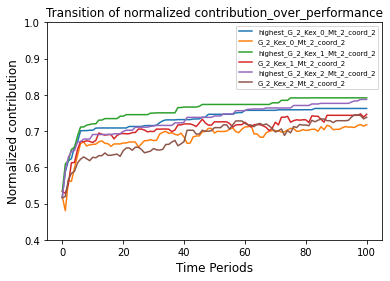

<Figure size 4800x2700 with 0 Axes>

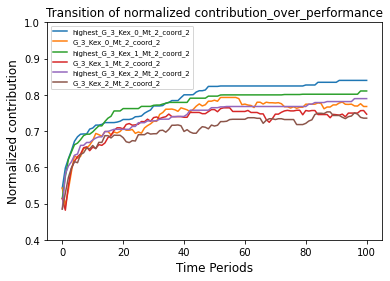

<Figure size 4800x2700 with 0 Axes>

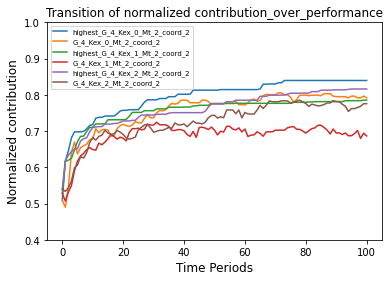

<Figure size 4800x2700 with 0 Axes>

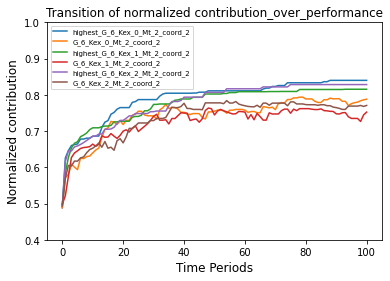

<Figure size 4800x2700 with 0 Axes>

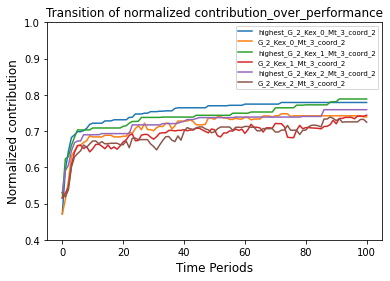

<Figure size 4800x2700 with 0 Axes>

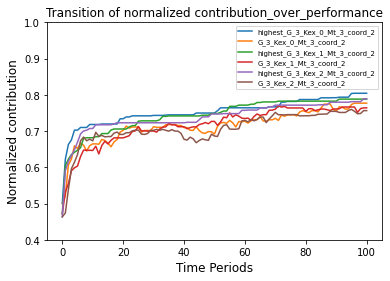

<Figure size 4800x2700 with 0 Axes>

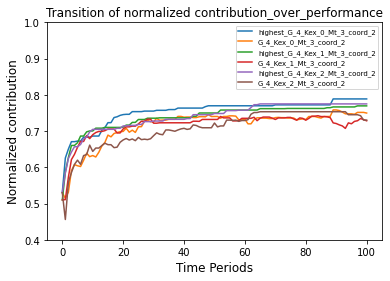

<Figure size 4800x2700 with 0 Axes>

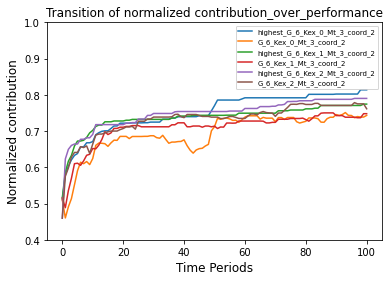

<Figure size 4800x2700 with 0 Axes>

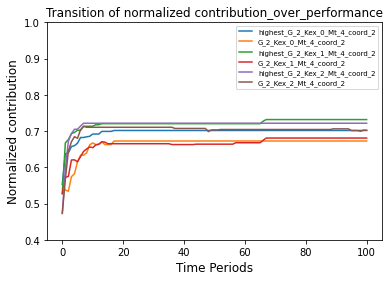

<Figure size 4800x2700 with 0 Axes>

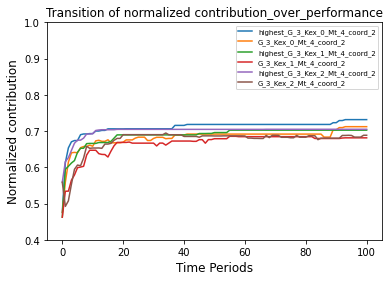

<Figure size 4800x2700 with 0 Axes>

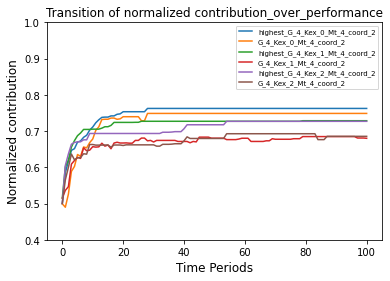

<Figure size 4800x2700 with 0 Axes>

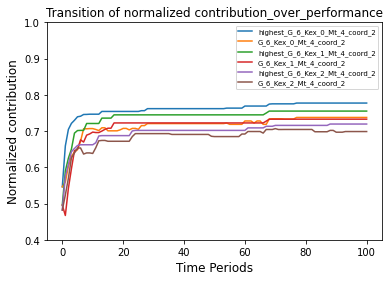

<Figure size 4800x2700 with 0 Axes>

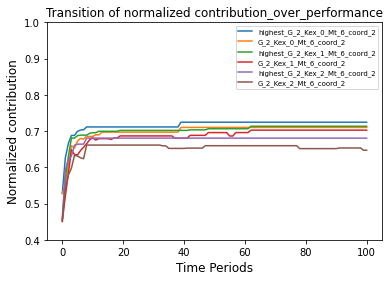

<Figure size 4800x2700 with 0 Axes>

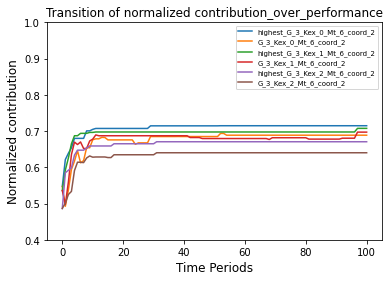

<Figure size 4800x2700 with 0 Axes>

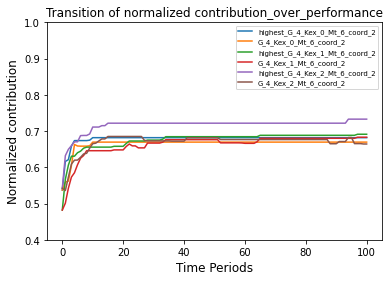

<Figure size 4800x2700 with 0 Axes>

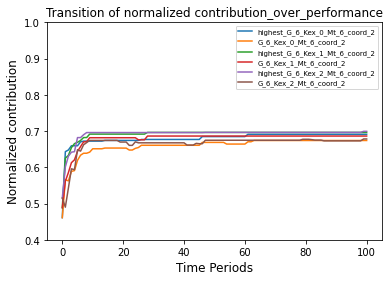

In [ ]:
import numpy as np
from os.path import expanduser  # new
import matplotlib.pyplot as plt
import csv
from google.colab import drive
import os
import random
import pandas as pd

N = 12  #要素数
K = 3
i = 1000  # 期数
t = 100   #一期あたりの回数
coord = 1
file_specific = '_over_performance' #ファイルにつける特異的な名前
file_name ='/content/drive/My Drive'
save_folder_name = '/NK_workshop/Graduation_ver_4/'

KG_matrix = \
  np.array([
            [2,5,6,7],
            [3,3,4,5],
            [4,2,3,4],
            [6,1,2,3]
            ])
  
Mt_arr = [2,3,4,6]
counter = 1  

for coord in [2]:

  for Mt in Mt_arr:
  # for Mt in [2]:
    for GG in [0,1,2,3]:
    # for GG in [0]:
      plt.figure(facecolor='white', figsize=(16, 9), dpi=300)

      for KK in [1,2,3]:
      # for KK in [1]:
        G = KG_matrix[GG,0]
        K = KG_matrix[GG,KK]
        Kex = K - int(N/G) +1

        print('G:'+ str(G))
        print('K:'+ str(K))
        print('Kex:'+ str(Kex)) 
        
        NK_landscape = np.load(file_name + '/NK_workshop/NK_land_type_1' + '_D_' + str(G) + '_K_' + str(K) + '_i_' + str(i) + '.npy')

        var_set = Var_set(N, K, Mt, coord) 
        environment = Environment(12, NK_landscape)
        agent = Agent(var_set, environment, lamb=0.01)
        for i1 in range(int(i/50)):
          for t1 in range(t):
            agent.local_search()
              

          high_str = str('highest_G_' + str(G) + '_Kex_' + str(Kex) +'_Mt_'+str(Mt) + '_coord_' + str(var_set.coord))
          norm_str = str('G_' + str(G) + '_Kex_' + str(Kex) +'_Mt_'+str(Mt) + '_coord_' + str(var_set.coord))

        
          if KK == 1 and i1 ==0:
            output_sum = pd.DataFrame(np.array(agent.rec_highest).reshape(len(agent.rec_highest),1),columns=[high_str])
            output_sum[norm_str] = agent.rec_norm
          elif i1 == 0:
            output_sum[high_str] = agent.rec_highest
            output_sum[norm_str] = agent.rec_norm
          else:
            output_sum[high_str] += agent.rec_highest
            output_sum[norm_str] += agent.rec_norm

          print(output_sum)


          agent = Agent(var_set, environment)
          environment.step()

        output_ave = output_sum / int(i/50)
        print(output_ave)

        if counter == 1:
          result = output_ave
        else:
          result = result.join(output_ave, rsuffix='_a')  

        print(result)

        print(str(counter) + '周目が終わりました')
        counter += 1
      label_str = str('G='+str(G) +', K='+ str(K)+ ', Kex=' +str(Kex))
      output_ave.plot()
      plt.ylim(0.4,1)
      plt.title('Transition of normalized contribution'+file_specific, size=12)
      plt.xlabel('Time Periods', size=12)
      plt.ylabel('Normalized contribution', size=12)
      plt.legend(fontsize='x-small')
      if not os.path.exists(file_name + save_folder_name):
        os.makedirs(file_name + save_folder_name)
      plt.savefig(file_name + save_folder_name+ '_G_' + str(G) + '_K_' + str(K) + '_i_' + str(i)+'_Mt_'+str(Mt) + '_coord_' + str(var_set.coord) +'_'+str(file_specific)+'.jpg', format='jpg')

result.to_csv(str(file_name + save_folder_name + file_specific + 'rec_result.csv'))

###実行



In [38]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import copy
import random
import sys
import resource
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import animation, rc
from keras.models import Sequential
from keras.layers import Dense, ReLU
from keras.optimizers import RMSprop

Optimizer = RMSprop()


class Var_set:
  def __init__(self, N, K, Mt, coord):
    #意思決定の数
    self.N = int(N)
    #相互依存レベル
    self.K = int(K)
    #組織（Agent)の部門分け
    self.Mt = int(Mt)
    #部門外部的相互依存レベル
    self.Kex = int(self.K - self.get_Nt() +1)
    #グループ間の相互関係
    #0 = decentralized, 1= sequential, 2= proposal
    self.coord = int(coord)

    #プロパティを名前と中に入っているものを表示
    # for key, value in self.__dict__.items():
    #  print(key, ':', value)

  #一部門ごとに割り当てられている意思決定数を返す関数
  def get_Nt(self):
    #一部門の意思決定数
    return int(self.N / self.Mt)

class Environment:
  def __init__(self, N, landscape):
    #何枚目の適応度地形を使用するか
    self.i = 0
    #意思決定の個数
    self.N = N
    #上でつくった適応度地形
    self.landscape = landscape
    #2進数→10進数の変換用配列
    self.converter = np.power(2, np.arange(N-1, -1, -1))
    #適応度地形ごとの最高点・最低点を入れておく
    self.reset()
    #プロパティを名前と中に入っているものを表示
    # for key, value in self.__dict__.items():
    #  print(key, ':', value)
        
  def reset(self):
    self.max_fit = np.max(self.landscape[self.i, :, 2*self.N])
    self.min_fit = np.min(self.landscape[self.i, :, 2*self.N])

  # n+1枚目の適応度地形に
  def step(self):
    self.i += 1
    self.reset()

  # 貢献度を計算
  def get_contr_norm(self, decimal):
    return (self.landscape[self.i, decimal, 2*self.N] - self.min_fit) / (self.max_fit - self.min_fit)
  
  # 配列から貢献度
  def get_norm_from_comb(self, comb):
    decimal = np.sum(comb * self.converter)
    norm = (self.landscape[self.i, decimal, 2*self.N] - self.min_fit) / (self.max_fit - self.min_fit)
    # print('norm:' +str(norm) )
    return norm

  # ノイズ入りの貢献度
  def get_future_norm_from_comb(self, comb):
    norm = self.get_norm_from_comb(comb)
    norm += np.random.normal(0,0.15)
    return norm


class Brain:
  def __init__(self, var_set, n_mid=12,  gamma=0.9, r=0.99):
    self.eps = 1.0  # ε
    self.gamma = gamma  # 割引率
    self.r = r  # εの減衰率
    n_states = var_set.N +1
    n_action = var_set.get_Nt()
    

    model = Sequential()
    model.add(Dense(n_mid, input_shape=(n_states,)))
    model.add(ReLU()) 
    model.add(Dense(n_mid))
    model.add(ReLU()) 
    model.add(Dense(n_mid))
    model.add(ReLU()) 
    model.add(Dense(n_action))
    model.compile(loss="mse", optimizer=optimizer)
    self.model = model

  def train(self, states, next_states, action, reward, terminal):
    q = self.model.predict(states)  
    next_q = self.model.predict(next_states)
    t = np.copy(q)
    if terminal:
        t[:, action] = reward  #  エピソード終了時の正解は、報酬のみ
    else:
        t[:, action] = reward + self.gamma*np.max(next_q, axis=1)
    self.model.train_on_batch(states, t)

  def get_action(self, states):
    q = self.model.predict(states)
    if np.random.rand() < self.eps:
        action = np.random.randint(q.shape[1], size=q.shape[0])
    else:
    action = np.argmax(q, axis=1)
    if self.eps > 0.1:  # εの下限
        self.eps *= self.r
    return action

  def adjust_action(self, actions):
    rtrn_arr = np.copy(actions[0])
    print(actions)
    for rtrn_item in np.arange(len(rtrn_arr)):    
      if rtrn_arr[rtrn_item] > 0:
        rtrn_arr[rtrn_item] = 1
      else:
        rtrn_arr[rtrn_item] = 0

    return rtrn_arr


class Agent:
  def __init__(self,var_set, environment, brain_arr, T_star = 5, lamb = 0.5, Nut = 0, b = 0.5):
    # 変数のセット
    self.var_set = var_set
    # 環境
    self.environment = environment
    # ニューラルネットワーク
    self.brain_arr = brain_arr
    # 意思決定配列
    self.long_jump()
    # 貢献度
    self.contr_norm = self.environment.get_norm_from_comb( self.comb)
    # 貢献度の記録
    self.rec_norm = [0]
    self.rec_norm[0] = self.contr_norm
    # 最高貢献度 
    self.highest_norm = self.contr_norm
    # 最高貢献度の記録
    self.rec_highest = [self.highest_norm]
    # 上昇度合い
    self.delta_Vt = 0
    # 学習強度
    self.lamb = lamb
    # 要求レベル
    self.Nut = Nut
    # 可能的な意思決定配列の確率
    self.prob_feasible_options = self.create_prob_feasible_options()

    self.T_star = T_star  
    self.b = b
    self.recursion_num = 0
    sys.setrecursionlimit(50000)
    self.recursion_lim = sys.getrecursionlimit()-1
    self.recursion_self_lim = 19
   
    # for key, value in self.__dict__.items():
    #  print(key, ':', value)

  # 完全にランダムなベクトルを再度作るロングジャンプの際のもの
  def long_jump (self):
    self.comb = np.random.binomial(1, 0.5, self.var_set.N)

  # 部門ごとの二進数の配列を返す
  def get_comb_divided_decimal(self):
    Nt = self.var_set.get_Nt()
    Mt = self.var_set.Mt


    comb_divided_decimal = [0] * Mt
    for a2 in range(Mt):
      element_bin = self.comb[a2*Nt:a2*Nt+Nt]
      element_bin_str = ''.join(map(str,element_bin))
      # print('element_bin_str:' + str(element_bin_str))
      # print('element_bin:' + str(element_bin))
      element_decimal = int(element_bin_str,2)
      # print('element_decimal:' + str(element_decimal))
      comb_divided_decimal[a2] = element_decimal
    
    # print('comb_divided_decimal:' + str(comb_divided_decimal))
    # print('self.comb:'+ str(self.comb))
    return comb_divided_decimal
  
  # 周辺探索
  def local_search(self):
    Nt = self.var_set.get_Nt()
    Mt = self.var_set.Mt
    # previous_comb_divided_decimal = self.get_comb_divided_decimal(self.comb)
    if self.var_set.coord != 0 :
      comb_alpha = copy.copy(self.comb)
      comb_beta = copy.copy(self.comb)
      comb_current = copy.copy(self.comb)
    comb_new = copy.copy(self.comb)

    num_feasible_option = np.power(2,Nt)

    for a3 in range(Mt):
      bin_choice = self.get_new_bin_choice(a3)
      if self.var_set.coord == 0:
        comb_new[a3*Nt:(a3*Nt)+Nt] = bin_choice
      elif self.var_set.coord == 1: #sequential
        comb_beta = copy.copy(comb_new)
        comb_current = copy.copy(comb_new)
        comb_beta[a3*Nt:(a3*Nt)+Nt] = bin_choice
        current_norm = self.environment.get_future_norm_from_comb(comb_current)
        beta_norm = self.environment.get_future_norm_from_comb(comb_beta)
        if current_norm >= beta_norm:
          comb_beta[a3*Nt:(a3*Nt)+Nt] = comb_current[a3*Nt:(a3*Nt)+Nt]
        else:
          comb_current[a3*Nt:(a3*Nt)+Nt] = comb_beta[a3*Nt:(a3*Nt)+Nt]
        comb_new[a3*Nt:(a3*Nt)+Nt] = comb_beta[a3*Nt:(a3*Nt)+Nt]
      else: #proposal
        comb_beta[a3*Nt:(a3*Nt)+Nt] = bin_choice 
        bin_choice = self.get_new_bin_choice(a3)
        comb_alpha[a3*Nt:(a3*Nt)+Nt] = bin_choice

    if self.var_set.coord == 2:
      contr_alpha = self.environment.get_future_norm_from_comb(comb_alpha)
      contr_beta = self.environment.get_future_norm_from_comb(comb_beta)

      if contr_alpha >= contr_beta and contr_alpha >= self.contr_norm :
        comb_new = comb_alpha
      elif contr_beta >= self.contr_norm:
        comb_new = comb_beta
      else:
        comb_new = comb_current



    if np.sum(np.abs(np.array(comb_new) - np.array(self.comb))) >= 4 \
    and self.recursion_num < self.recursion_lim\
    and self.recursion_num < self.recursion_self_lim:
      self.local_search()
      self.recursion_num += 1
    else:
      self.recursion_num = 0
      self.comb = comb_new
      self.contr_norm = self.environment.get_norm_from_comb(self.comb)
      if self.contr_norm > self.highest_norm:
        self.highest_norm = self.contr_norm
      self.rec_norm.append(self.contr_norm)
      self.rec_highest.append(self.highest_norm)
      # print('self.comb:'+str(self.comb))
      self.train(self.get_comb_divided_decimal())
      
  # 各部門の意思決定配列を返す
  def get_new_bin_choice(self,a5):
    Nt = self.var_set.get_Nt()
    num_feasible_option = np.power(2,Nt)
    choice = np.random.choice(np.arange(num_feasible_option), 1, p= self.prob_feasible_options[a5])
    # print('choice:%d'%choice)
    imperfect_bin_choice = format(int(choice),'b')
    bin_choice = list(imperfect_bin_choice.zfill(Nt))
    return bin_choice

  # 直近T_star回の平均を返す
  def get_average_norm(self):
    scope_end = len(self.rec_norm)
    scope_start = scope_end - self.T_star
    norm_scoped = self.rec_norm[scope_start:scope_end]
    average_norm = np.sum(self.rec_norm)/np.count_nonzero(self.rec_norm)
    return average_norm

  # ΔVtを得る
  def get_delta_Vt(self):
    average_norm = self.get_average_norm()
    # print('average_norm:'+str(average_norm))
    current_norm = self.environment.get_norm_from_comb(self.comb)
    # print('current_norm:'+str(current_norm))
    delta_Vt = (current_norm - average_norm)/average_norm
    # print('delta_Vt:' + str(delta_Vt))
    return delta_Vt

  # τ_tを得る
  def get_tau_t(self):
    b = self.b
    delta_Vt_1 = self.delta_Vt
    delta_Vt = self.get_delta_Vt()
    self.delta_Vt = delta_Vt
    self.Nut = b*delta_Vt_1 + (1-b)*self.Nut
    # self.Nut = 0.1
    if delta_Vt >= self.Nut:
      tau_t = True
    else :
      tau_t = False
    return tau_t



